# Customer Segmentation: Function Compilation

This is another module for Customer Segmentation. In this module, I'm going to use **Online Retail II** data that could be obtained from UCI Machine Learning Repository (*https://archive.ics.uci.edu/ml/datasets/Online+Retail+II*). The difference here is I'm going to compile all the functions here into a ready-to-use functions. There are several functions here, they are the functions for:

- Visualization Method
- Elbow Method
- Silhouette Score Method

The only things you need to do for this function is to pass the data frame with the features that has been normalized to the functions.

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans  # to perform kmeans analysis
from sklearn.preprocessing import StandardScaler  # to standardize data using z-score
from sklearn import decomposition  # the method for PCA is included in sklearn.decomposition library
from sklearn.metrics import silhouette_score # to calculate silhouetter score from K Means

In [2]:
df = pd.read_excel('online_retail_II.xlsx')
df.head(5)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


The data contain several columns, including:
1. **Invoice**      : The ID for invoice
2. **StockCode**    : Stock ID for the product a customer purchase
3. **Desciprtion**  : Desciprtion of the product
4. **Quantity**     : Number of pieces customer purchases
5. **Invoice Date** : When the transaction was made
6. **Price**        : Price of each product (not gross revenue)
7. **Country**      : The country where the transaction was made

In [6]:
# rename 'Customer ID' to 'CustomerID'

df = df.rename(columns={'Customer ID' : 'CustomerID'})
df.columns

Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'CustomerID', 'Country'],
      dtype='object')

## Data Cleaning

In [7]:
print('Maximum value for Quantity:', df.Quantity.max())
print('Maximum value for Quantity:', df.Quantity.min())

Maximum value for Quantity: 19152
Maximum value for Quantity: -9600


In [8]:
# handling negative value

df = df[df.Quantity > 0]
display(df.head(5))
print('Number of records after eliminating negative value:', len(df))

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,CustomerID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


Number of records after eliminating negative value: 513135


In [9]:
# dropping nan records in Customer ID column

df = df[df.CustomerID.isna() == False]
display(df.head(5))
print('Number of records after eliminatin nan value in customer ID column:', len(df))

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,CustomerID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


Number of records after eliminatin nan value in customer ID column: 407695


In [10]:
# checking data range
# seems that the data in the previous month is incomplete

print('Date Range:', df.InvoiceDate.min(), '-', df.InvoiceDate.max())

Date Range: 2009-12-01 07:45:00 - 2010-12-09 20:01:00


In [11]:
# ignore data for the last month aka 12/2010

df = df[df.InvoiceDate < '2010-12-01']
print('Date Range after ignoring data in the last month:', df.InvoiceDate.min(), '-', df.InvoiceDate.max())

Date Range after ignoring data in the last month: 2009-12-01 07:45:00 - 2010-11-30 19:35:00


In [12]:
# making a new column for total sales value (gross revenue per transaction)

df['TotalSales'] = df.Quantity * df.Price
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,CustomerID,Country,TotalSales
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0


## Data Preparation

### Creating DataFrame

In [23]:
# transform data so each record shows one customer and their total transaction with the business

df_cust = df.groupby('CustomerID').agg({
    'TotalSales' : sum,  # sum of transaction with us
    'Invoice': lambda x: x.nunique()  # count unique values of the invoice
    })

df_cust.head(5)

,TotalSales,Invoice
CustomerID,,
12346.0,372.86,11
12347.0,611.53,1
12348.0,222.16,1
12349.0,2671.14,3
12351.0,300.93,1


In [24]:
# renaming column
# calculate average sales of the customers in every transaction

df_cust.columns = ['TotalSales', 'OrderCount']
df_cust['AvgSales'] = round((df_cust.TotalSales / df_cust.OrderCount), 2)

,TotalSales,OrderCount,AvgSales
CustomerID,,,
12346.0,372.86,11,33.90
12347.0,611.53,1,611.53
12348.0,222.16,1,222.16
12349.0,2671.14,3,890.38
12351.0,300.93,1,300.93
...,...,...,...
18283.0,641.77,6,106.96
18284.0,461.68,1,461.68
18285.0,427.00,1,427.00


### Normalize/Standardize Data

In [73]:
# in order to do segmentation, all the records should be on the same scale
# using StandardScaler to standardize the data
# StandardScaler -> standardize features by removing the mean and scaling to unit variance

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_segment = pd.DataFrame()
df_segment['CustomerID'] = df_cust.index
df_segment[['TotalSales', 'OrderCount', 'AvgSales']] = scaler.fit_transform(df_cust[['TotalSales', 'OrderCount', 'AvgSales']])

df_segment

,CustomerID,TotalSales,OrderCount,AvgSales
0,12346.0,-0.188795,0.860649,-0.686303
1,12347.0,-0.161039,-0.427804,0.454317
2,12348.0,-0.206320,-0.427804,-0.314554
3,12349.0,0.078482,-0.170113,1.004950
4,12351.0,-0.197160,-0.427804,-0.159011
...,...,...,...,...
4263,18283.0,-0.157522,0.216423,-0.542034
4264,18284.0,-0.178465,-0.427804,0.158415
4265,18285.0,-0.182498,-0.427804,0.089934
4266,18286.0,-0.081389,-0.298959,0.526767


## Data Analysis

In [32]:
df_segment.describe()

,TotalSales,OrderCount,AvgSales
count,4.268000e+03,4.268000e+03,4.268000e+03
mean,3.947431e-18,-1.633111e-16,3.134533e-17
std,1.000117e+00,1.000117e+00,1.000117e+00
min,-2.321561e-01,-4.278039e-01,-7.532435e-01
25%,-1.964154e-01,-4.278039e-01,-3.946757e-01
50%,-1.521177e-01,-2.989586e-01,-1.806231e-01
75%,-3.724681e-02,8.757738e-02,8.569368e-02
max,3.713667e+01,2.482588e+01,2.270732e+01


### Choosing Number of Clusters: Using Iteration and Visualization

In [33]:
from sklearn import decomposition

features = ['TotalSales', 'OrderCount', 'AvgSales']

n = 2
pca = decomposition.PCA(n_components=n)
pca_res = pca.fit_transform(df_segment[features])

df_segment['pc1'] = pca_res[:, 0]
df_segment['pc2'] = pca_res[:, 1]

df_segment.head()

,TotalSales,OrderCount,AvgSales,pc1,pc2
0,-0.188795,0.860649,-0.686303,0.166383,-0.973351
1,-0.161039,-0.427804,0.454317,-0.217667,0.604755
2,-0.206320,-0.427804,-0.314554,-0.524471,-0.083656
3,0.078482,-0.170113,1.004950,0.307083,0.971469
4,-0.197160,-0.427804,-0.159011,-0.462404,0.055610


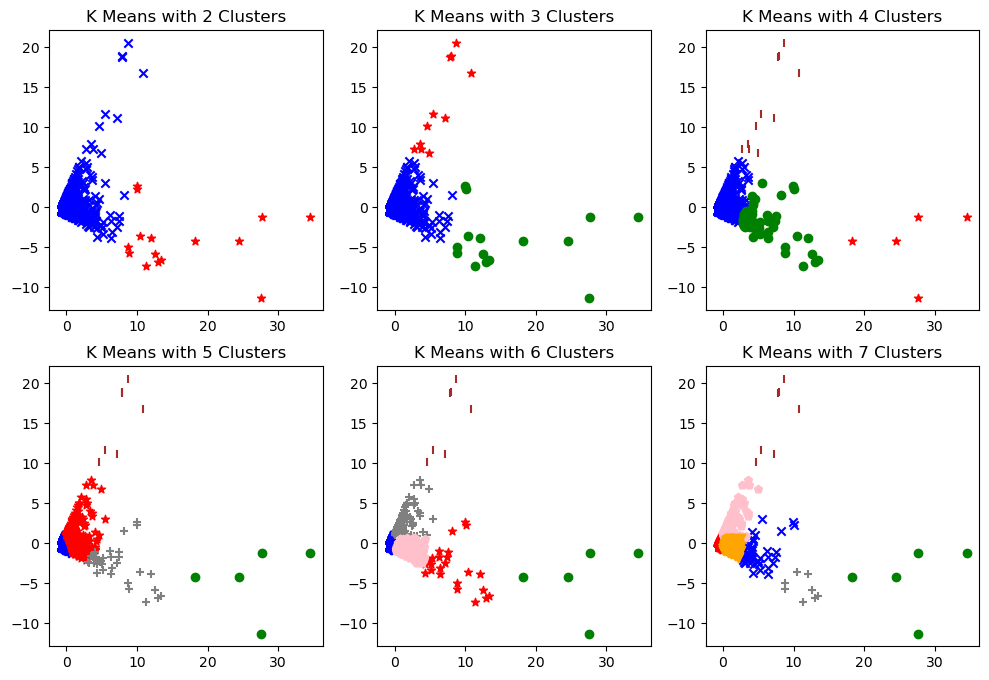

In [35]:
from sklearn.cluster import KMeans

markers = ['x', '*', 'o', '|', '+', 'p', 'v']  # markers for plot, based on how many segmentations we made, in this case 7
colors = ['blue', 'red', 'green', 'brown', 'gray', 'pink', 'orange']

plt.figure(figsize=(12, 8))

i = 1

for i in range(1, 7):
    
    n_clust = i + 1
    model = KMeans(n_clusters=n_clust, random_state=42)  # define the model for k means

    model.fit(df_segment[features])  # fitting the model to the data
    df_segment['cluster_ori'] = model.predict(df_segment[features])  # predicting the cluster

    ax = plt.subplot(2, 3, i)
    for clust, color in zip(range(n_clust), colors):  # make loops to make the principal components plot
        temp = df_segment[df_segment['cluster_ori'] == clust]  # filter the data to only for one specific cluster
        plt.scatter(temp['pc1'], temp['pc2'], marker=markers[clust], label='Cluster' + str(clust), color=color)
        plt.title('K Means with ' + str(n_clust) + ' Clusters')
    
plt.show()

### Choosing Number of Clusters: Using Elbow Method

<function matplotlib.pyplot.show(close=None, block=None)>

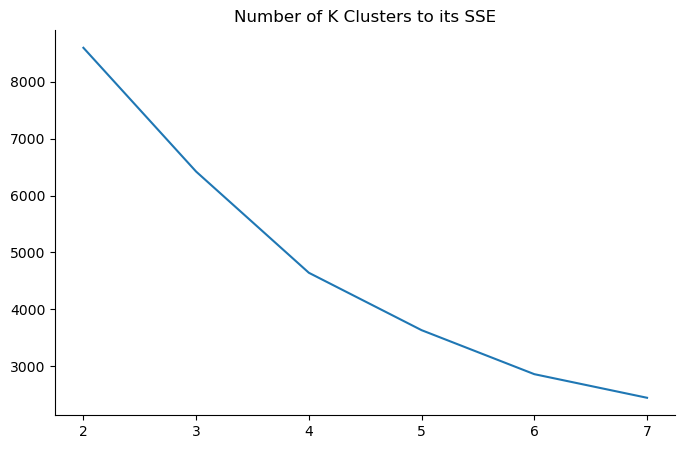

In [40]:
# using sum of squarred error
# choose the elbow location, where suddenly the value of sse drops

sse_s = []
df_sse_s = pd.DataFrame()

for n_clust in range(2, 8):    
    
    model = KMeans(n_clusters=n_clust, random_state=42)  # define the model for k means
    model.fit(df_segment[features])  # fitting the model to the data
    sse = model.inertia_
    sse_s.append(sse)
    
    row_df = n_clust - 2
    df_sse_s.loc[row_df, 'n_cluster'] = n_clust
    df_sse_s.loc[row_df, 'sse'] = sse
    
plt.figure(figsize=(8, 5))
plt.plot(range(2, 8), sse_s)
plt.title('Number of K Clusters to its SSE')
plt.xticks(range(2, 8))
sns.despine()
plt.show

### Choosing Number of Clusters: Using Silhouette Score

In [46]:
# Silhouette Coefficient or silhouette score is a metric used to calculate the goodness of a clustering technique. Its value ranges from -1 to 1.
# 1: Means clusters are well apart from each other and clearly distinguished.
# 0: Means clusters are indifferent, or we can say that the distance between clusters is not significant.
# -1: Means clusters are assigned in the wrong way.

from sklearn.metrics import silhouette_score

for n_clust in range(2,8):
    model = KMeans(n_clusters=n_clust, random_state=42)
    model.fit(df_segment[features])
    
    silhouette_avg = silhouette_score(df_segment[features], model.labels_)
    
    print(f'Silhouette score for {n_clust} Clusters:', round(silhouette_avg, 4))

Silhouette score for 2 Clusters: 0.9419
Silhouette score for 3 Clusters: 0.928
Silhouette score for 4 Clusters: 0.8612
Silhouette score for 5 Clusters: 0.6143
Silhouette score for 6 Clusters: 0.6182
Silhouette score for 7 Clusters: 0.5633


## Visualization

Let's say based on all the methods we tried, we decided to **choose 4 clusters** as the number of clusters.

In [74]:
# model the n_cluster again

n_clust = 4

model = KMeans(n_clusters=n_clust, random_state=42)

model.fit(df_segment[features])
df_segment['cluster_ori'] = model.predict(df_segment[features])

df_segment[df_segment.cluster_ori == 0]

,CustomerID,TotalSales,OrderCount,AvgSales,cluster_ori
0,12346.0,-0.188795,0.860649,-0.686303,0
1,12347.0,-0.161039,-0.427804,0.454317,0
2,12348.0,-0.206320,-0.427804,-0.314554,0
3,12349.0,0.078482,-0.170113,1.004950,0
4,12351.0,-0.197160,-0.427804,-0.159011,0
...,...,...,...,...,...
4263,18283.0,-0.157522,0.216423,-0.542034,0
4264,18284.0,-0.178465,-0.427804,0.158415,0
4265,18285.0,-0.182498,-0.427804,0.089934,0
4266,18286.0,-0.081389,-0.298959,0.526767,0


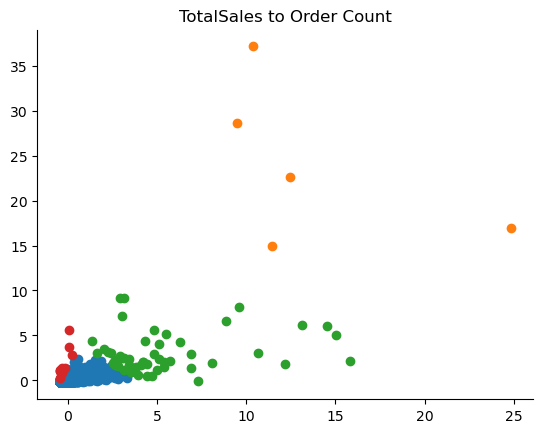

In [75]:
# plot on standardized variable

for i in range(n_clust):
    plt.scatter(df_segment[df_segment['cluster_ori'] == i]['OrderCount'], 
                df_segment[df_segment['cluster_ori'] == i]['TotalSales'])

plt.title('TotalSales to Order Count')    
sns.despine()
plt.show()

In [80]:
# plot on original value

df_cust_segment = df_cust.reset_index().merge(df_segment[['CustomerID', 'cluster_ori']], on='CustomerID')
df_cust_segment

,CustomerID,TotalSales,OrderCount,AvgSales,cluster_ori
0,12346.0,372.86,11,33.90,0
1,12347.0,611.53,1,611.53,0
2,12348.0,222.16,1,222.16,0
3,12349.0,2671.14,3,890.38,0
4,12351.0,300.93,1,300.93,0
...,...,...,...,...,...
4263,18283.0,641.77,6,106.96,0
4264,18284.0,461.68,1,461.68,0
4265,18285.0,427.00,1,427.00,0
4266,18286.0,1296.43,2,648.22,0


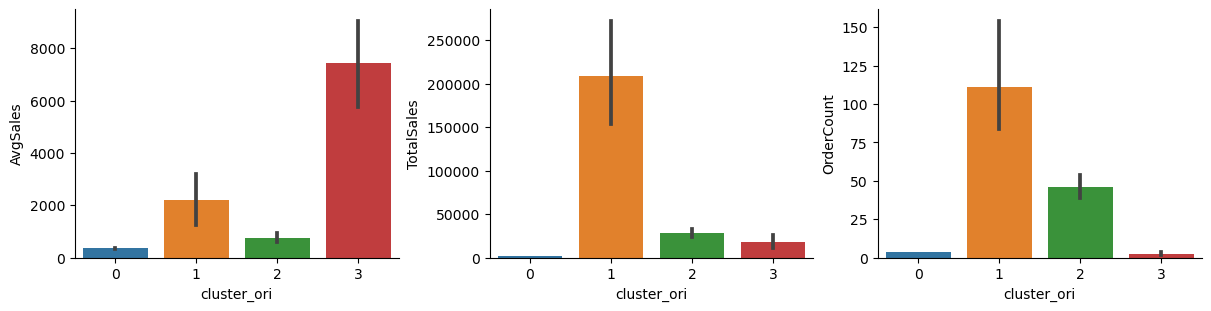

In [99]:
plt.figure(figsize=(12, 3), layout="constrained")

ax1 = plt.subplot(1, 3, 1)
ax1 = sns.barplot(data=df_cust_segment, x='cluster_ori', y='AvgSales')

ax2 = plt.subplot(1, 3, 2)
ax2 = sns.barplot(data=df_cust_segment, x='cluster_ori', y='TotalSales')

ax3 = plt.subplot(1, 3, 3)
ax3 = sns.barplot(data=df_cust_segment, x='cluster_ori', y='OrderCount')

sns.despine()
plt.show()

# Compiling Function

## Visualization Method

In [154]:
markers = ['x', '*', 'o', '|', '+', 'p', 'v']  # markers for plot, based on how many segmentations we made, in this case 7
colors = ['blue', 'red', 'green', 'brown', 'gray', 'pink', 'orange']

def opt_visualize(df, features, clusters, markers, colors):
    
    # PCA analysis first

    pca = decomposition.PCA(n_components=2)
    pca_res = pca.fit_transform(df[features])

    df['pc1'] = pca_res[:, 0]
    df['pc2'] = pca_res[:, 1]
    
    plt.figure(figsize=(20, 6), layout="constrained")
    
    i = 1
    
    for i in range(1, clusters):
        n_clust = i + 1
        model = KMeans(n_clusters=n_clust, random_state=42)  # define the model for k means
        
        model.fit(df[features])  # fitting the model to the data
        df['cluster_label'] = model.predict(df[features])  # predicting the cluster

        n_column = np.ceil(clusters / 2)
        n_column = int(n_column)
        
        ax = plt.subplot(2, n_column, i)
        
        for clust, color in zip(range(n_clust), colors):  # make loops to make the principal components plot
            temp = df[df['cluster_label'] == clust]  # filter the data to only for one specific cluster
            plt.scatter(temp['pc1'], temp['pc2'], marker=markers[clust], label='Cluster' + str(clust), color=color)
            plt.title('K Means with ' + str(n_clust) + ' Clusters')
            
    sns.despine()
    plt.show()

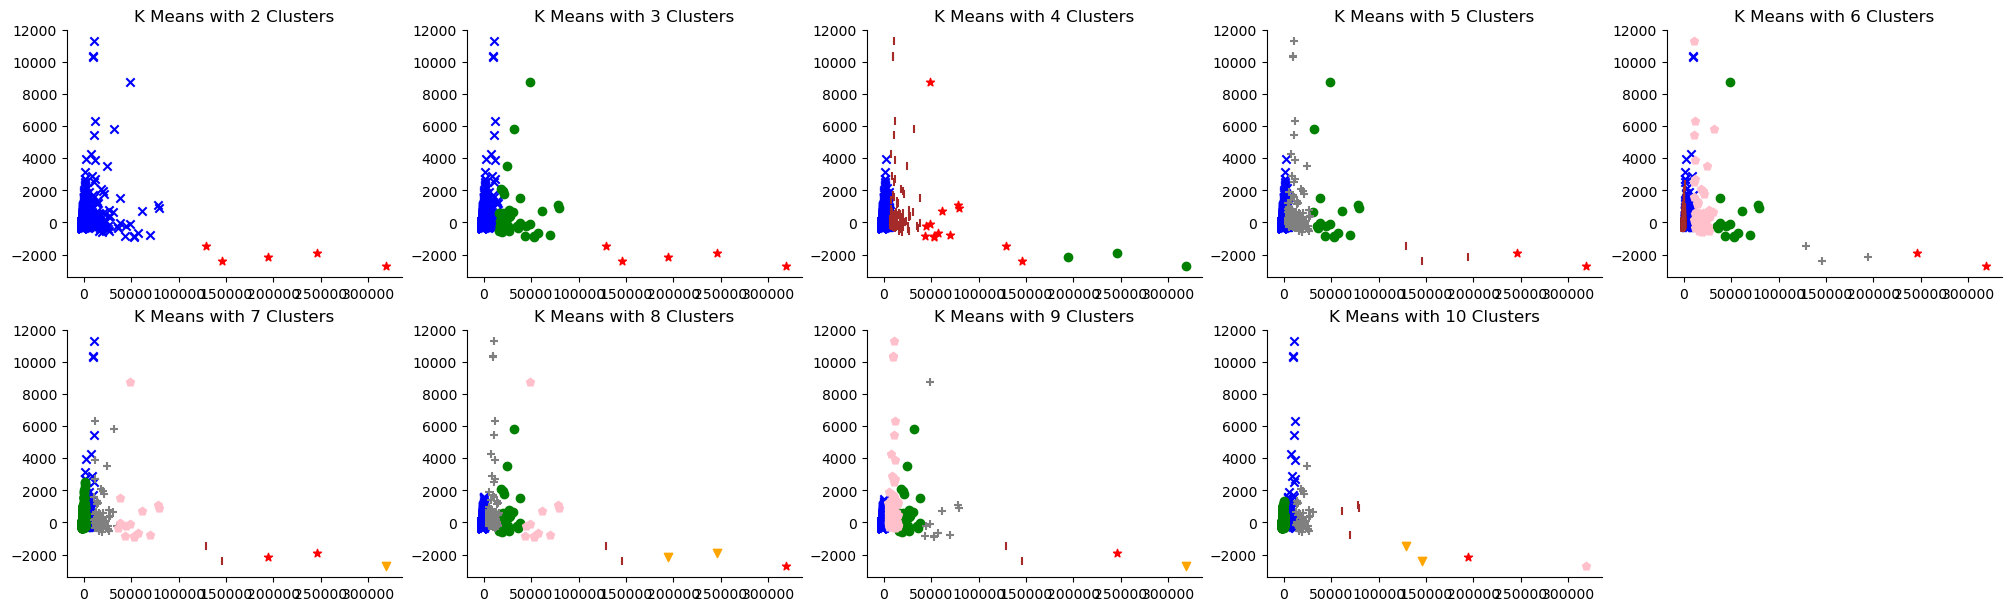

In [155]:
opt_visualize(df_cust_segment, features, 10, markers, colors)

## Elbow Method

In [104]:
'''
opt_elbow() is a function to choose the best number for segments using elbow method
df          : dataframe containing your data
features    : variables used to make the segmentation
clusters    : how many clusters you want to plot (n-1)
'''

def opt_elbow(df, features, clusters):
    sse_s = []
    df_sse_s = pd.DataFrame()
    
    for n_clust in range(2, clusters):    
        model = KMeans(n_clusters=n_clust, random_state=42) 
        model.fit(df[features])
        sse = model.inertia_
        sse_s.append(sse)
        
        row_df = n_clust - 2
        df_sse_s.loc[row_df, 'n_cluster'] = n_clust
        df_sse_s.loc[row_df, 'sse'] = sse
        
    plt.figure(figsize=(8, 5))
    plt.plot(range(2, clusters), sse_s)
    plt.title('Number of K Clusters to its SSE')
    plt.xticks(range(2, clusters))
    sns.despine()
        
    plt.show

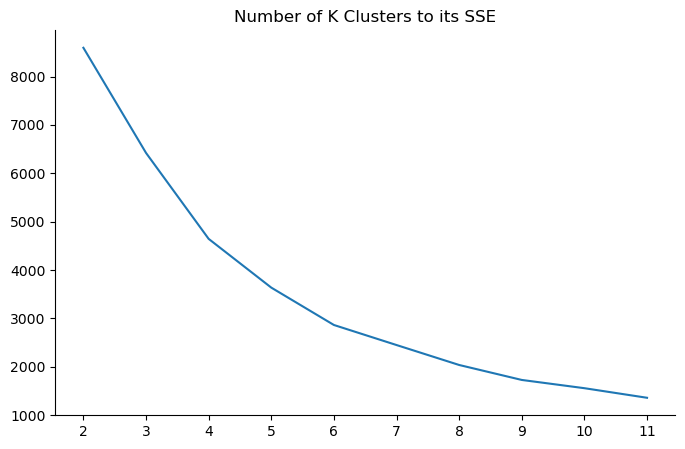

In [107]:
opt_elbow(df_segment, features, 8)

## Silhouette Score Method

In [108]:
'''
opt_silhouette() is a function to choose the best number for segments by looking at silhouette score of each number of clusters
df          : dataframe containing your data
features    : variables used to make the segmentation
clusters    : how many clusters you want to plot (n-1)
'''

def opt_silhouette(df, features, clusters):
    
    for n_clust in range(2, clusters):
        model = KMeans(n_clusters=n_clust, random_state=42)
        model.fit(df[features])
        silhouette_avg = silhouette_score(df[features], model.labels_)
        print(f'Silhouette score for {n_clust} Clusters:', round(silhouette_avg, 4))

In [109]:
opt_silhouette(df_segment, features, 8)

Silhouette score for 2 Clusters: 0.9419
Silhouette score for 3 Clusters: 0.928
Silhouette score for 4 Clusters: 0.8612
Silhouette score for 5 Clusters: 0.6143
Silhouette score for 6 Clusters: 0.6182
Silhouette score for 7 Clusters: 0.5633
